In [3]:
#Calculating the most popular technical indicators
'''
Some indicators:
Bollinger bands are a statistical method, used for deriving information 
about the prices and volatility of a certain asset over time.

RSI:(relative strength index) is an indicator that uses the closing prices of an asset 
to identify oversold/overbought conditions.
Most commonly, the RSI is calculated using a 14-day period and is measured on a scale
from 0 to 100 (it is an oscillator).
Traders usually buy an asset when it is oversold (if the RSI is below 30) and sell 
when it is overbought (if the RSI is above 70).
More extreme high/low levels,
such as 80–20, are used less frequently and, at the same time, imply stronger momentum.

The moving average convergence divergence (MACD) is a momen-tum indicator 
showing the relationship between two exponential moving averages (EMA) 
of a given asset’s price, most commonly 26- and 12-day ones. 
The MACD line is the diference between the fast (short period) and slow (long period) EMAs.
Lastly, we calculate the MACD signal line as a 9-day EMA of the MACD line. 
Traders can use the crossover of the lines as a trading signal.
'''
import pandas as pd
import yfinance as yf
import talib
'''
https://github.com/mrjbq7/ta-lib—The GitHub repository of TA-lib.
Please refer to this source for more details on installing the library.
'''

'\nWith the calculated SMA value, we can observe the direction of the stock price trend. \nIf the SMA line is up, it means that the price is trending upward, \nand if the SMA line is downward, it means that the price is trending downward. In addition, when the stock price breaks the SMA line upwards, \nit can be assumed that the market is bullish for the stock and vice versa.\n'

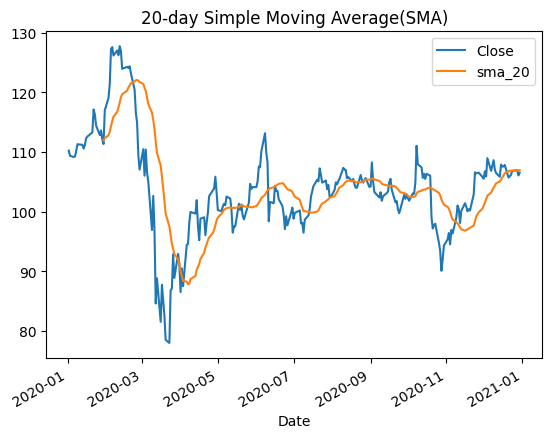

In [7]:
df = yf.download("IBM",
                 start="2020-01-01",                 
                 end="2020-12-31",
                 progress=False,
                 auto_adjust=True) 
df["sma_20"] = talib.SMA(df["Close"], timeperiod = 20)
(
    df[["Close", "sma_20"]]
    .plot(title = "20-day Simple Moving Average(SMA)")
)
'''
With the calculated SMA value, we can observe the direction of the stock price trend. 
If the SMA line is up, it means that the price is trending upward, 
and if the SMA line is downward, it means that the price is trending downward. 
In addition, when the stock price breaks the SMA line upwards, 
it can be assumed that the market is bullish for the stock and vice versa.
'''

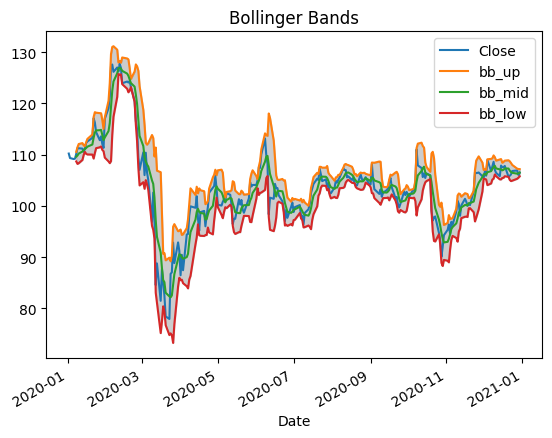

In [6]:
import matplotlib.pyplot as plt
df["bb_up"], df["bb_mid"], df["bb_low"] = talib.BBANDS(df["Close"])

fig, ax = plt.subplots()
(
    df.loc[:, ["Close", "bb_up", "bb_mid", "bb_low"]]
    .plot(ax = ax, title = "Bollinger Bands")
)
ax.fill_between(df.index, df["bb_low"], df["bb_up"],
               color = "gray",
               alpha = .4)
#running the snippet generates the following plot:

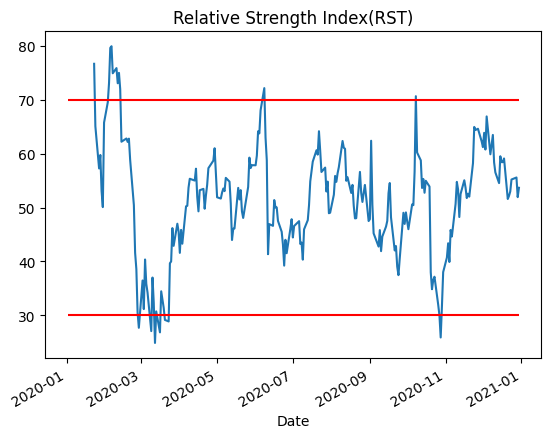

In [8]:
#Calculate and plot the RSI
df["rsi"] = talib.RSI(df["Close"])

fig, ax = plt.subplots()
df["rsi"].plot(ax = ax,
              title = "Relative Strength Index(RST)")
ax.hlines(y = 30,
         xmin = df.index.min(),
         xmax = df.index.max(),
         color = "red")
ax.hlines(y = 70,
         xmin = df.index.min(),
         xmax = df.index.max(),
         color = "red")
plt.show()

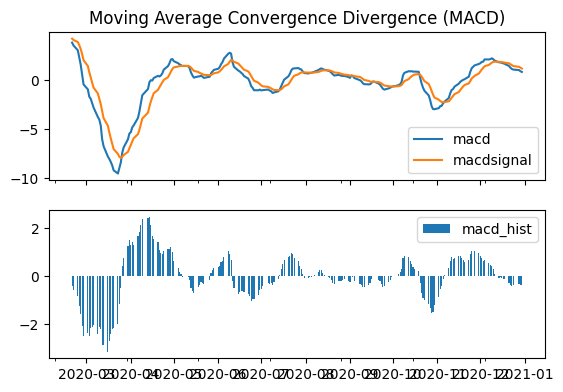

In [14]:
#Calculate and plot the MACD
df["macd"], df["macdsignal"], df["macdhist"] = talib.MACD(
    df["Close"], fastperiod = 12, slowperiod = 26, signalperiod = 9
)

fig, ax = plt.subplots(2, 1, sharex = True)
(
    df[["macd", "macdsignal"]].
    plot(ax = ax[0],
        title = "Moving Average Convergence Divergence (MACD)")
)
ax[1].bar(df.index, df["macdhist"].values, label = "macd_hist")
ax[1].legend()

In [19]:
#using another library ta to calculate technical indicators.
#One of itsfeatures is that it can calculate all of the available 30+ indicators in a single line of code
from ta import add_all_ta_features
df = df[["Open", "High", "Low", "Close", "Volume"]].copy()
df = add_all_ta_features(df, open="Open", high="High",
                         low="Low", close="Close",
                         volume="Volume")
df

C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\ta\trend.py:730: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  self._trs[0] = diff_directional_movement.dropna()[
C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\ta\trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\Jackson\AppData\Local\Programs\Python\Python310\lib\site-packages\ta\trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


,Open,High,Low,Close,Volume,volume_adi,volume_obv,volume_cmf,volume_fi,volume_em,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,109.890604,110.639493,109.703388,110.232491,3293436,4.295746e+05,3293436,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.170767,NaN,0.000000
2020-01-03,108.726596,109.776668,108.718457,109.353386,2482890,9.261648e+05,810546,NaN,NaN,-39.375836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.797500,-0.800697,-0.797500
2020-01-06,108.604500,109.271981,108.425417,109.158028,2537073,2.780222e+06,-1726527,NaN,NaN,-13.309154,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.178649,-0.178808,-0.974724
2020-01-07,108.824289,109.858075,108.588229,109.231285,3232977,2.821634e+06,1506450,NaN,NaN,14.707724,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.067111,0.067089,-0.908267
2020-01-08,109.491758,110.590667,109.011493,110.142960,4545916,4.789952e+06,6052366,NaN,NaN,20.076221,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.834628,0.831164,-0.081220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-23,106.127269,107.266676,106.007332,106.144402,2817819,-2.888477e+07,13538582,-0.106192,-684695.540152,44.413312,...,1.073521,1.451644,-0.378123,-5.395448,-2.946212,-2.449236,105.551378,0.234604,0.234329,-3.708606
2020-12-24,107.086769,107.172440,106.409982,106.821190,1842111,-2.873991e+07,15380693,-0.145071,-408779.144772,6.382690,...,1.013988,1.364112,-0.350124,-10.299777,-4.416925,-5.882852,105.560376,0.637611,0.635587,-3.094642
2020-12-28,107.172444,108.457481,106.624160,106.932571,3781499,-3.124912e+07,19162192,-0.159313,-290212.245920,36.342052,...,0.964085,1.284107,-0.320022,-10.982977,-5.730136,-5.252841,105.576225,0.104269,0.104215,-2.993599


In [20]:
#Downloading the technical indicators
#I have to skip these methods because I can't get the free API key
from alpha_vantage.techindicators import TechIndicators
ta_api = TechIndicators(key="YOUR_KEY_HERE", 
                        output_format="pandas")
rsi_df, rsi_meta = ta_api.get_rsi(symbol="IBM", 
                                  time_period=14)
fig, ax = plt.subplots()
rsi_df.plot(ax=ax, 
            title="RSI downloaded from Alpha Vantage")ax.hlines(y=30, 
          xmin=rsi_df.index.min(), 
          xmax=rsi_df.index.max(), 
          color="red")
ax.hlines(y=70, 
          xmin=rsi_df.index.min(),
          xmax=rsi_df.index.max(), 
          color="red")
rsi_meta

In [21]:
#another way to download the MACD using its API
import intrinio_sdk as intrinio 
import pandas as pd
intrinio.ApiClient().set_api_key("YOUR_KEY_HERE")
security_api = intrinio.SecurityApi()
r = security_api.get_security_price_technicals_macd(
    identifier="IBM", 
    fast_period=12, 
    slow_period=26, 
    signal_period=9, 
    price_key="close", 
    start_date="2020-01-01", 
    end_date="2020-12-31",
    page_size=500
)
macd_df = (
    pd.DataFrame(r.technicals_dict)
    .sort_values("date_time")
    .set_index("date_time")
)
macd_df.index = pd.to_datetime(macd_df.index).date
fig, ax = plt.subplots(2, 1, sharex=True)
(
    macd_df[["macd_line", "signal_line"]]
    .plot(ax=ax[0], 
          title="MACD downloaded from Intrinio")
)
ax[1].bar(df.index, macd_df["macd_histogram"].values, 
          label="macd_hist")
ax[1].legend()

In [22]:
#Recognizing candlestick patterns
'''
Similar to all approaches to technical analysis,we should have a few things in mind
while using pattern recognition. 
First, the patterns are only informative within the limitations of the given chart
(in a specifed frequency: intraday, daily, weekly, and so on).
Second, the patterns’ predictive potency decreases very quickly 
afer a few (3–5) bars once the pattern has been completed.
Third, in the modern electronic environment, many signals identifed by
analyzing candlestick patterns might not work reliably anymore.
Some big players are also able to set up traps by
creating fake candlestick patterns to be picked up by other market participants.
'''
import pandas as pd
import yfinance as yf
import talib
import mplfinance as mpf

In [24]:
df = yf.download("BTC-USD",
                 period="9mo",
                 interval="1h",
                 progress=False)
df["3_line_strike"] = talib.CDL3LINESTRIKE(
    df["Open"], df["High"], df["Low"], df["Close"]
)
df[df["3_line_strike"] == -100].head()

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2022-08-17 00:00:00+00:00,23881.316406,24001.574219,23859.001953,24001.574219,24001.574219,60770304,-100
2022-09-26 07:00:00+00:00,18724.796875,18915.773438,18721.285156,18910.804688,18910.804688,1267722240,-100
2022-11-04 10:00:00+00:00,20577.988281,20623.609375,20561.404297,20623.609375,20623.609375,198004736,-100
2022-11-07 15:00:00+00:00,20668.363281,20776.542969,20668.363281,20774.429688,20774.429688,1869037568,-100
2022-11-24 22:00:00+00:00,16561.378906,16603.044922,16555.150391,16600.615234,16600.615234,0,-100


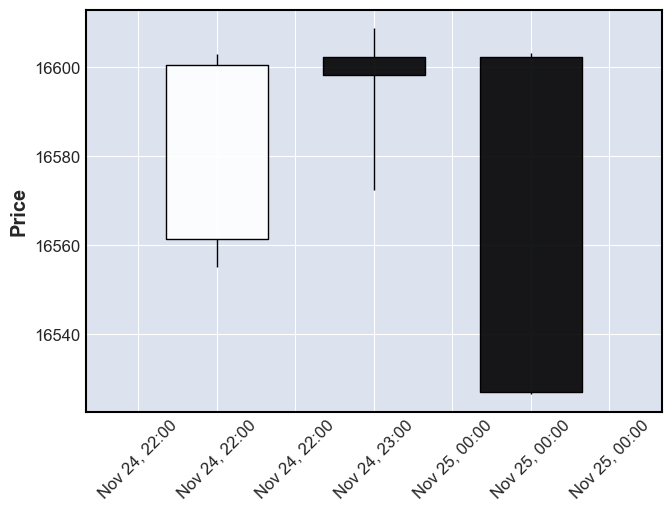

In [30]:
mpf.plot(df["2022-11-24 22:00:00":"2022-11-25 00:00:00"],
        type = "candle")

In [26]:
df[df["3_line_strike"] == 100]

,Open,High,Low,Close,Adj Close,Volume,3_line_strike
Datetime,,,,,,,
2022-07-24 22:00:00+00:00,22809.019531,22972.927734,22682.843750,22682.843750,22682.843750,686942208,100
2022-08-02 23:00:00+00:00,23102.617188,23115.316406,22976.037109,22976.037109,22976.037109,0,100
2022-08-05 12:00:00+00:00,23378.304688,23421.923828,23005.257812,23016.701172,23016.701172,1145415680,100
2022-08-07 08:00:00+00:00,23021.542969,23021.542969,22945.878906,22945.878906,22945.878906,0,100
2022-08-24 00:00:00+00:00,21526.455078,21546.074219,21370.353516,21408.832031,21408.832031,95813632,100
2022-09-05 05:00:00+00:00,19892.410156,19892.410156,19720.605469,19734.845703,19734.845703,681379840,100
2022-10-06 18:00:00+00:00,20134.660156,20134.660156,20014.103516,20035.410156,20035.410156,0,100
2022-10-10 22:00:00+00:00,19240.255859,19243.257812,19102.978516,19136.289062,19136.289062,539576320,100
2022-12-31 17:00:00+00:00,16605.513672,16607.652344,16580.427734,16586.601562,16586.601562,0,100


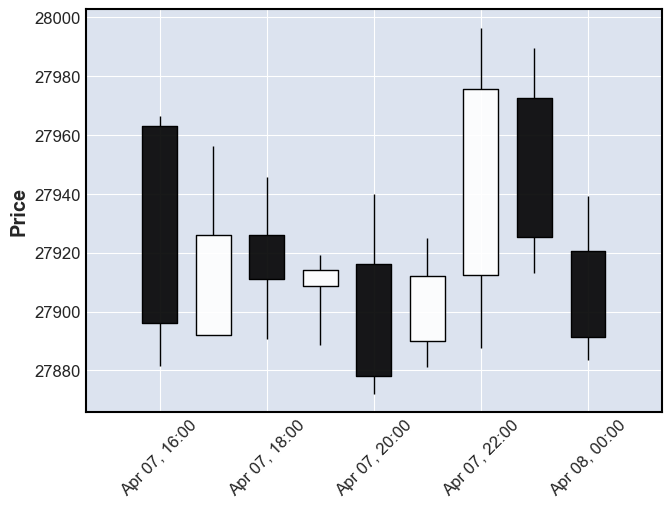

In [29]:
mpf.plot(df["2023-04-07 16:00:00" : "2023-04-08 00:00:00"],
        type = "candle")

In [ ]:
'''
100—Indicates the bullish variant of the pattern 
0—No pattern detected
-100—Indicates the bearish variant of the pattern
'''

In [32]:
#try to identify all the possible patterns at once
candle_names = talib.get_function_groups()["Pattern Recognition"]
for candle in candle_names:
    df[candle] = getattr(talib, candle)(df["Open"], df["High"],
                                       df["Low"], df["Close"])
with pd.option_context("display.max_rows", len(candle_names)):
    display(df[candle_names].describe().transpose().round(2))

,count,mean,std,min,25%,50%,75%,max
CDL2CROWS,6556.0,-0.05,2.14,-100.0,0.0,0.0,0.0,0.0
CDL3BLACKCROWS,6556.0,-0.09,3.02,-100.0,0.0,0.0,0.0,0.0
CDL3INSIDE,6556.0,-0.20,10.84,-100.0,0.0,0.0,0.0,100.0
CDL3LINESTRIKE,6556.0,0.06,6.30,-100.0,0.0,0.0,0.0,100.0
CDL3OUTSIDE,6556.0,0.11,23.79,-100.0,0.0,0.0,0.0,100.0
CDL3STARSINSOUTH,6556.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDL3WHITESOLDIERS,6556.0,0.32,5.65,0.0,0.0,0.0,0.0,100.0
CDLABANDONEDBABY,6556.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
CDLADVANCEBLOCK,6556.0,-1.04,10.13,-100.0,0.0,0.0,0.0,0.0
CDLBELTHOLD,6556.0,0.35,45.23,-100.0,0.0,0.0,0.0,100.0
